In [49]:
import matplotlib.pyplot as plt             # 그래프 출력을 위한 라이브러리
from sklearn import linear_model            # 선형회귀 라이브러리
import pandas as pd                         # csv 파일을 불러오기 위한 라이브러리
import logging                              # 출력되는 로그는 무시하는 라이브러리
import warnings                             # 출력되는 경고문을 무시하는 라이브러리

In [50]:
logging.getLogger('matplotlib.font_manager').disabled = True    # 출력되는 로그 무시
warnings.filterwarnings('ignore')                               # 출력되는 경고문 무시

In [51]:
data = pd.read_csv("./분향가격동향.csv", encoding='cp949')   # csv 데이터파일 읽어오기
data.head(3)                                                # 데이터 상위 3개의 데이터만 출력

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882


전용면적 60제곱미터이하 ===========================================


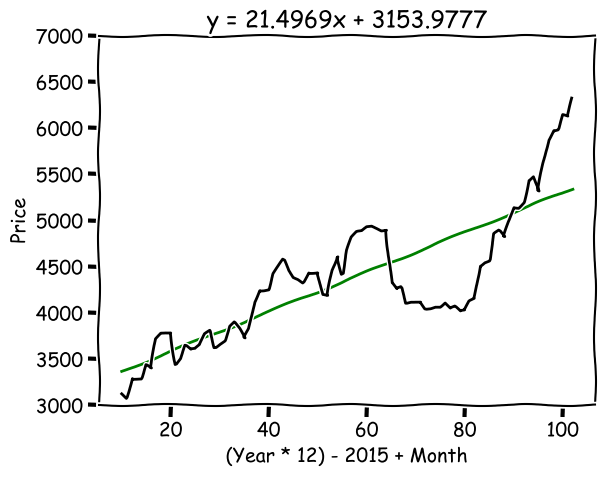

전용면적 60제곱미터초과 85제곱미터이하 ===========================================


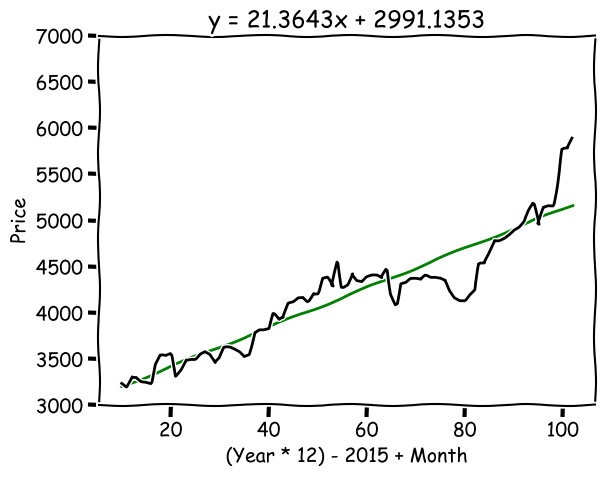

전용면적 85제곱미터초과 102제곱미터이하 ===========================================


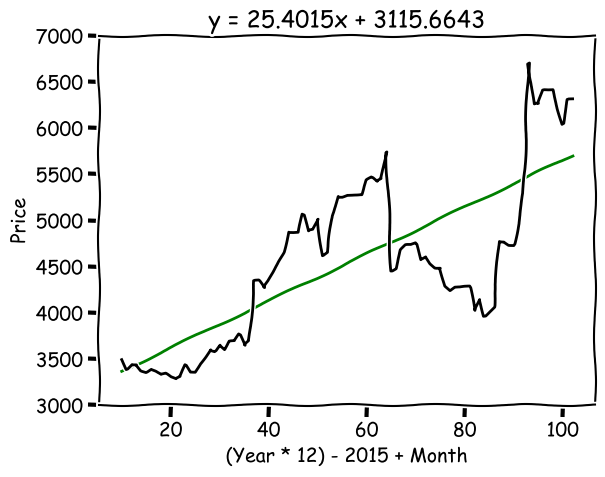

전용면적 102제곱미터초과 ===========================================


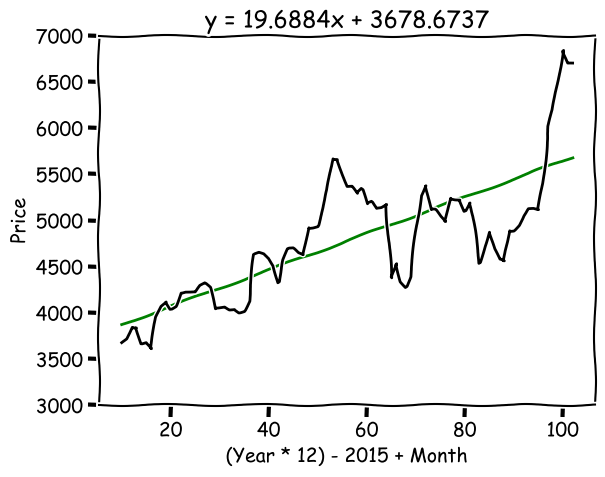

In [52]:
size_list = ['전용면적 60제곱미터이하',                 # 4개의 면적 리스트
             '전용면적 60제곱미터초과 85제곱미터이하',
             '전용면적 85제곱미터초과 102제곱미터이하',
             '전용면적 102제곱미터초과']

for size in size_list:                                                     # 면적 리스트에 따른 4개의 그래프 출력
    Gyeonggi_data = data[data['지역명'] == '경기']                          # 지역은 경기로 지정
    Gyeonggi_data_size = Gyeonggi_data[Gyeonggi_data['규모구분'] == size]   # 규모는 4개 모두 확인.

    # 최소 연도인 2015를 제외하기 위해 (2015-연도)*12 + 월 수식을 대입해 입력 데이터 생성
    X_data = (Gyeonggi_data_size['연도'].values - 2015) * 12 + Gyeonggi_data_size['월'].values.astype('int64')
    X_data = X_data.reshape(-1, 1)

    # 분양 가격을 출력 데이터로 지정, 연도-월에 따른 분양 가격 예측 프로그램
    y_data = Gyeonggi_data_size['분양가격(제곱미터)'].values.astype('int64')

    # 선형회귀 객체 생성
    reg = linear_model.LinearRegression()

    # 선형회귀 학습
    reg.fit(X_data, y_data)

    # 그래프의 X축과 y축 지정
    X = X_data
    y = reg.coef_ * X_data + reg.intercept_

    # 옛날 테마 지정
    with plt.xkcd():
        print(size, "===========================================")

        # coef는 기울기, intercept는 y절편을 의미한다.
        plt.title(f"y = {round(reg.coef_[0], 4)}x + {round(reg.intercept_, 4)}")
        plt.xlabel("(Year * 12) - 2015 + Month")
        plt.ylabel("Price")
        plt.plot(X, y, color='green')
        plt.plot(X_data, y_data, color='black')
        plt.ylim(3000, 7000)
        plt.show()